In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import kineticsPy as kpy

data_base_path = os.path.join('..','..','test','test_inputs')
result_base_path = os.path.join('..','usersguide','images')
water_cluster_input = os.path.join(data_base_path, 'WaterCluster_RoomTemp.cti')

def water_cluster_simulation():
    sim_result = kpy.cantera.simulate_isobar_adiabatic(
        water_cluster_input,
        'H2O:2.5e+14, N2:2.54e+17, H3O+:1e+10',
        10000, 2e-9, 100000,
        rtol=1e-11)

    return sim_result

def simple_synthetic_trajectory():
    species_names = ["Cl1", "Cl2", "H2O"]
    times = np.linspace(0, 4, 100)
    c_cl1 = np.exp(times * 0.3)
    c_cl2 = 5 - c_cl1
    c_H2O = times * 0.1

    data_array = np.vstack([c_cl1, c_cl2, c_H2O]).transpose()
    attributes = {'temperature': 298}

    tra = kpy.Trajectory(
        species_names, times, data_array, attributes,
        concentration_unit='mol/m^3',
        time_scaling_factor=1e-6)

    return tra

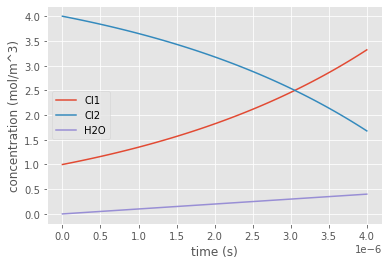

In [3]:
sim_result = simple_synthetic_trajectory()

# plot full trajectory:
kpy.plot(sim_result)
plt.savefig(os.path.join(result_base_path,'concentration_plot_base_01.svg'))

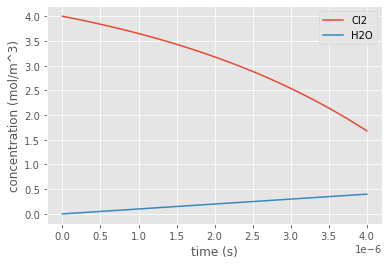

In [3]:
kpy.plot(sim_result, ['Cl2', 'H2O'])
plt.savefig(os.path.join(result_base_path,'concentration_plot_species_selection_01.svg'))

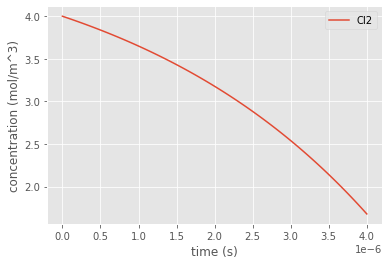

In [4]:
kpy.plot(sim_result, 'Cl2')
plt.savefig(os.path.join(result_base_path,'concentration_plot_species_selection_02.svg'))

    0  0.000e+00    298.150 100000.000  -8.852264e+04


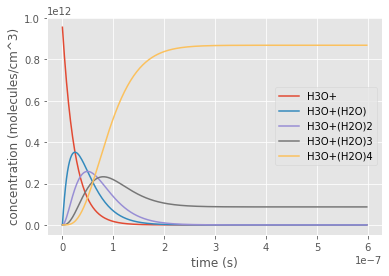

In [2]:
cl_sim_result = water_cluster_simulation()
selection = ['H3O+', 'H3O+(H2O)','H3O+(H2O)2','H3O+(H2O)3','H3O+(H2O)4']

kpy.plot(cl_sim_result, selection, time_steps=300)
plt.savefig(os.path.join(result_base_path,'concentration_plot_time_selection_01.svg'))

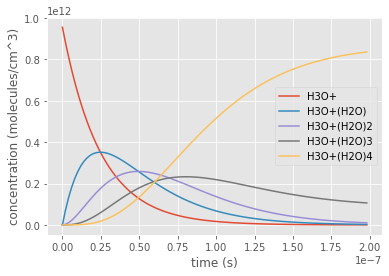

In [6]:
kpy.plot(cl_sim_result, selection, time_steps=100)
plt.savefig(os.path.join(result_base_path,'concentration_plot_time_selection_02.svg'))

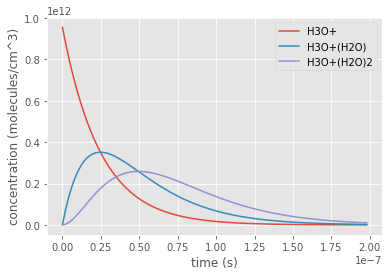

In [7]:
kpy.plot(cl_sim_result, ['H3O+', 'H3O+(H2O)','H3O+(H2O)2'], 100)
plt.savefig(os.path.join(result_base_path,'concentration_plot_time_selection_03.svg'))

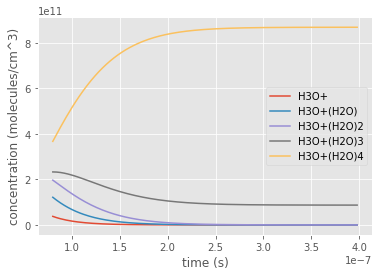

In [8]:
kpy.plot(cl_sim_result, selection, time_steps=(40, 200))
plt.savefig(os.path.join(result_base_path,'concentration_plot_time_selection_04.svg'))

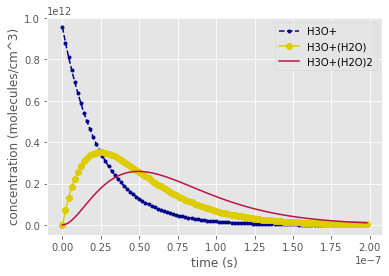

In [9]:
plot_conf = [
    ('H3O+', '.--', 'darkblue'),    # color names are allowed
    ('H3O+(H2O)', 'o-', '#DDCC00'), # color hex codes are also allowed
    ('H3O+(H2O)2', '-', '#BB1144')
]

kpy.plot(cl_sim_result, plot_conf, time_steps=100)
plt.savefig(os.path.join(result_base_path,'concentration_plot_line_styles_01.svg'))

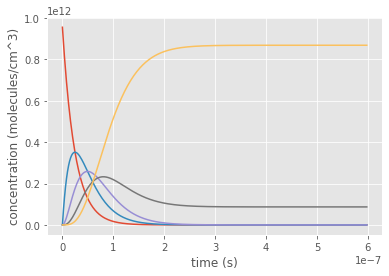

In [10]:
kpy.plot(cl_sim_result, selection, time_steps=300, legend='off')
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_01.svg'))

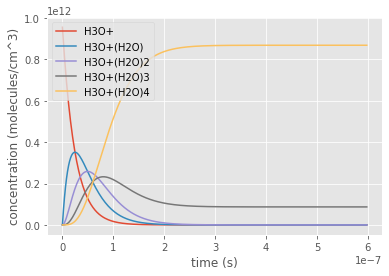

In [11]:
kpy.plot(cl_sim_result, selection, time_steps=300, legend='upper left')
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_02.svg'))

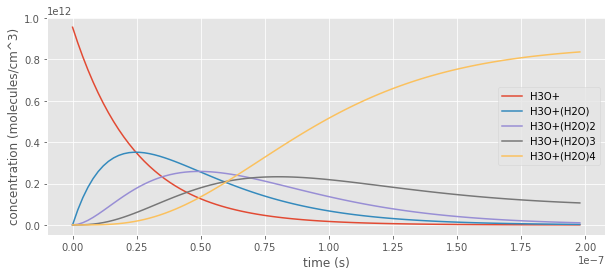

In [12]:
kpy.plot(cl_sim_result, selection, time_steps=100, figsize=(10,4))
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_03.svg'))

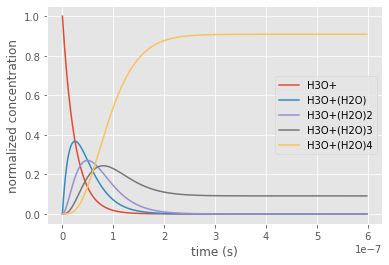

In [6]:
kpy.plot(cl_sim_result, selection, time_steps=300, normalized=True)
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_04.svg'))

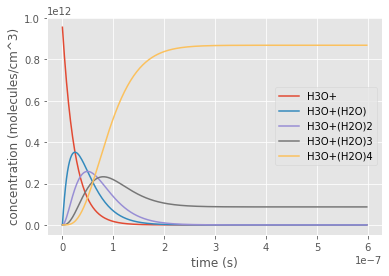

In [5]:
kpy.plot(cl_sim_result, selection, time_steps=300, log='none')
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_05.svg'))

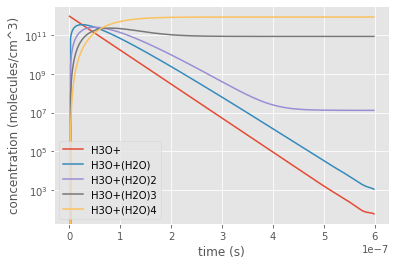

In [6]:
kpy.plot(cl_sim_result, selection, time_steps=300, log='concentration')
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_06.svg'))

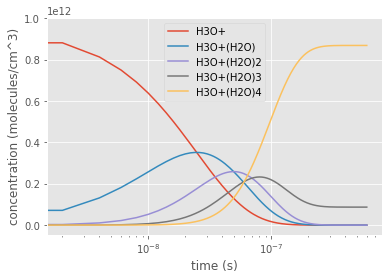

In [7]:
kpy.plot(cl_sim_result, selection, time_steps=300, log='time')
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_07.svg'))

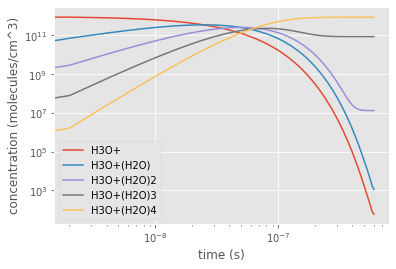

In [8]:
kpy.plot(cl_sim_result, selection, time_steps=300, log='both')
plt.savefig(os.path.join(result_base_path,'concentration_plot_additional_parameters_08.svg'))

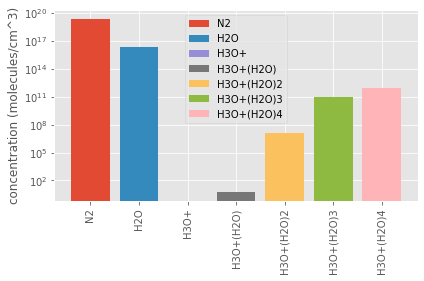

In [4]:
kpy.plot_equilibrium_state(cl_sim_result, log=True)
plt.savefig(os.path.join(result_base_path,'equilibrium_state_plot_01.svg'))

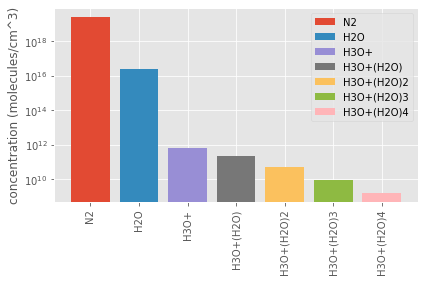

In [13]:
kpy.plot_average_concentrations(cl_sim_result, 10, log=True);
plt.savefig(os.path.join(result_base_path, 'average_concentration_box_plot_01.svg'))

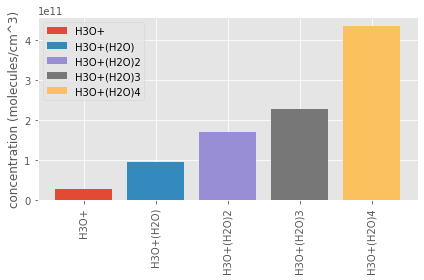

In [12]:
kpy.plot_average_concentrations(cl_sim_result, (40, 50), selection);
plt.savefig(os.path.join(result_base_path, 'average_concentration_box_plot_02.svg'))